In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("./spotify.csv")
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
dataset.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
cat_features = [col for col in dataset.columns if dataset[col].dtype == "O"]
num_features = [col for col in dataset.columns if dataset[col].dtype != "O"]

print(f"categorical features :{cat_features} total {len(cat_features) } features \n ----------------- \bn numerical_features  :{num_features} total {len(num_features) } features ")

categorical features :['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'] total 10 features 
 ----------------- n numerical_features  :['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'] total 13 features 


<Axes: >

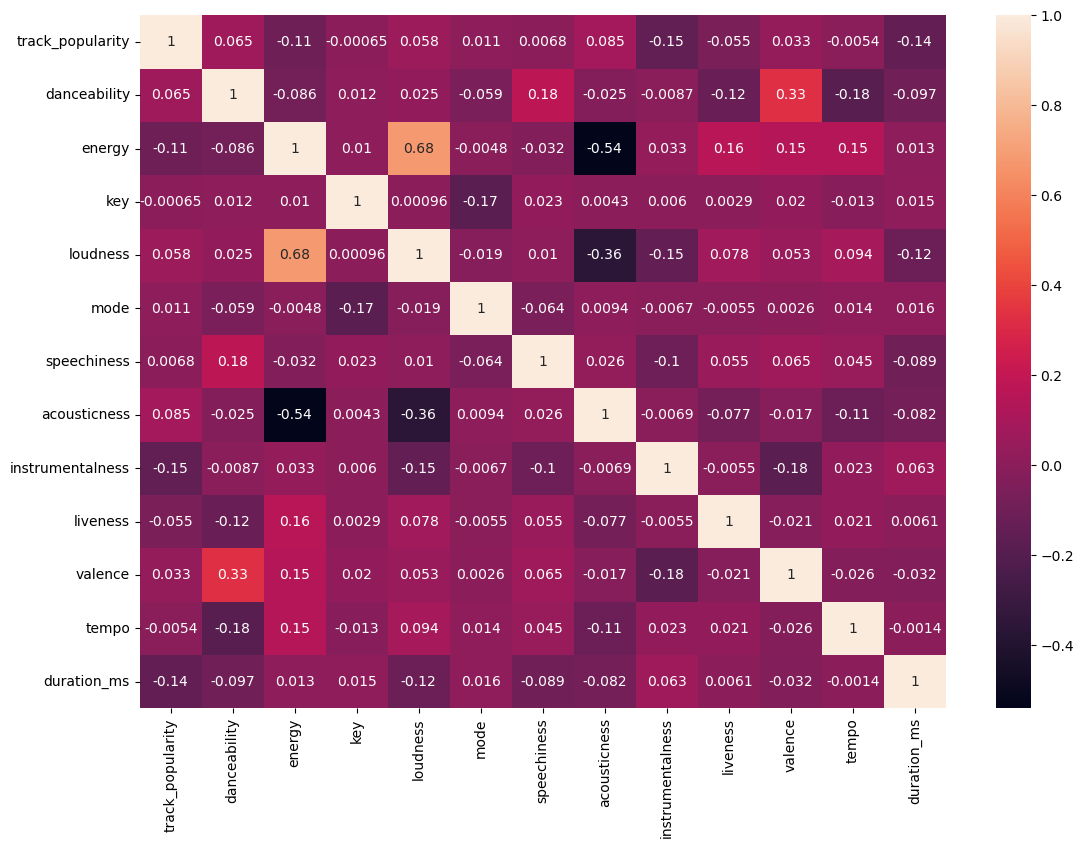

In [5]:
plt.figure(figsize=(13,9))
sns.heatmap(dataset[num_features].corr(), annot=True)

In [6]:
features =['playlist_genre', 'danceability', 'energy', 'loudness','tempo']
target = ['track_popularity']

df = dataset[features]
df.head()

,playlist_genre,danceability,energy,loudness,tempo
0,pop,0.748,0.916,-2.634,122.036
1,pop,0.726,0.815,-4.969,99.972
2,pop,0.675,0.931,-3.432,124.008
3,pop,0.718,0.930,-3.778,121.956
4,pop,0.650,0.833,-4.672,123.976


C:\Users\Gobinath\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

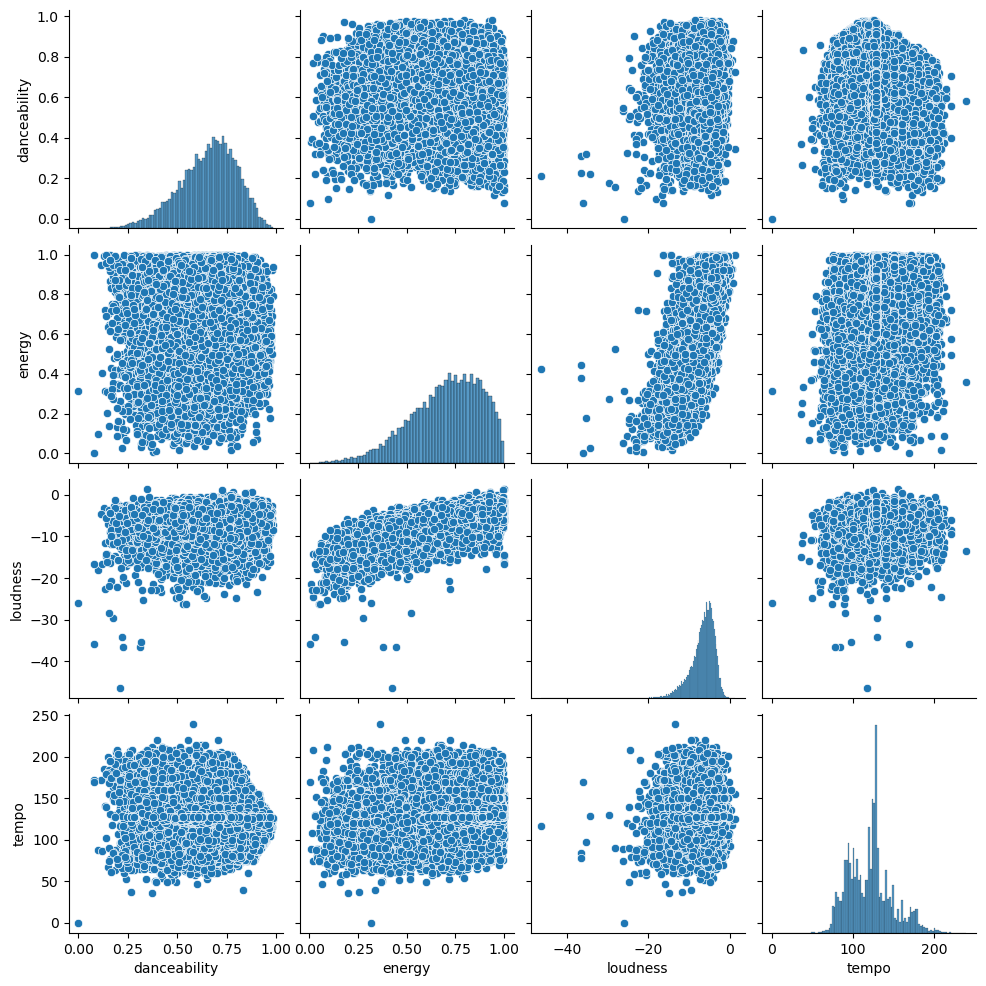

In [7]:
plt.figure(figsize=(10,20))
sns.pairplot(df)

In [8]:
cat_features = [feat for feat in df.columns if df[feat].dtype=="O"]
num_features = [feat for feat in df.columns if df[feat].dtype!="O"]



[print(feat,":  ",df[feat].unique()) for feat in cat_features if df[feat].nunique()<30]

playlist_genre :   ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']


[None]

In [9]:
x = dataset[features]
y= dataset[target]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train

,playlist_genre,danceability,energy,loudness,tempo
26069,r&b,0.788,0.534,-7.866,95.986
6219,rap,0.837,0.364,-11.713,123.984
19187,latin,0.847,0.663,-8.000,95.041
22032,r&b,0.794,0.534,-6.470,91.871
1113,pop,0.595,0.772,-8.033,134.900
...,...,...,...,...,...
25757,r&b,0.710,0.735,-4.733,115.753
11035,rap,0.812,0.681,-6.869,96.516
9128,rap,0.666,0.577,-10.658,148.107
11900,rock,0.576,0.288,-12.298,111.823


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("onehotencoder",OneHotEncoder(drop="first",handle_unknown="ignore"),[0])],remainder="passthrough")

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

X_train

array([[  0.   ,   0.   ,   1.   , ...,   0.534,  -7.866,  95.986],
       [  0.   ,   0.   ,   0.   , ...,   0.364, -11.713, 123.984],
       [  1.   ,   0.   ,   0.   , ...,   0.663,  -8.   ,  95.041],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.577, -10.658, 148.107],
       [  0.   ,   0.   ,   0.   , ...,   0.288, -12.298, 111.823],
       [  1.   ,   0.   ,   0.   , ...,   0.772,  -5.998, 124.058]])

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def model_evaluator(y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"score: {score}\n mae: {mae}\n mse: {mse} \n rmse: {rmse}")
    return {"score":score,"mae":mae,"mse":mse,"rmse":rmse}
    
    


reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
model_metrics = model_evaluator(y_test, y_pred)


score: 0.0741383451547939
 mae: 20.24784330296107
 mse: 589.5549361758408 
 rmse: 24.280752380761204


In [13]:
# from sklearn.svm import SVR

# model2 = SVR()

# model2.fit(X_train, y_train)

# y_pred = model2.predict(X_test)
# model_metrics = model_evaluator(y_test, y_pred)

# model_metrics

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train =poly.fit_transform(X_train)
X_test =poly.transform(X_test)

reg_poly = LinearRegression()
reg_poly.fit(X_train, y_train)

y_pred = reg_poly.predict(X_test)
model_metrics = model_evaluator(y_test, y_pred)


score: 0.09802581568120416
 mae: 19.96164834977493
 mse: 574.3442661066125 
 rmse: 23.965480719288994
